In [1]:
words = list(set(open('names.txt', 'r').read().splitlines()))

words[:10]

['nasra',
 'rickayla',
 'zailee',
 'any',
 'allianna',
 'wafaa',
 'yadelyn',
 'janeliz',
 'zacharius',
 'lexington']

In [2]:
len(words)

29494

In [3]:
# Add a special character '.' for the start and end of words, then sort and make unique all characters from the words list.
boundary_marker = ['.']
vocab = boundary_marker + sorted(list(set(''.join(words))))

# Define the size of the bigram matrix based on the number of unique characters
vocab_size = len(vocab)

# Create a mapping from character to integer
stoi = {s:i for i,s in enumerate(vocab)}

# Create a mapping from integer to character
itos = {i:s for i,s in enumerate(vocab)}

In [4]:
import torch

bigram_matrix = torch.zeros((vocab_size, vocab_size), dtype=torch.int32)

In [15]:
# count the occurances of bigrams
for w in words:
    # hallucinate a start and end character
    chs = boundary_marker + list(w) + boundary_marker
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        bigram_matrix[ix1, ix2] += 1

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

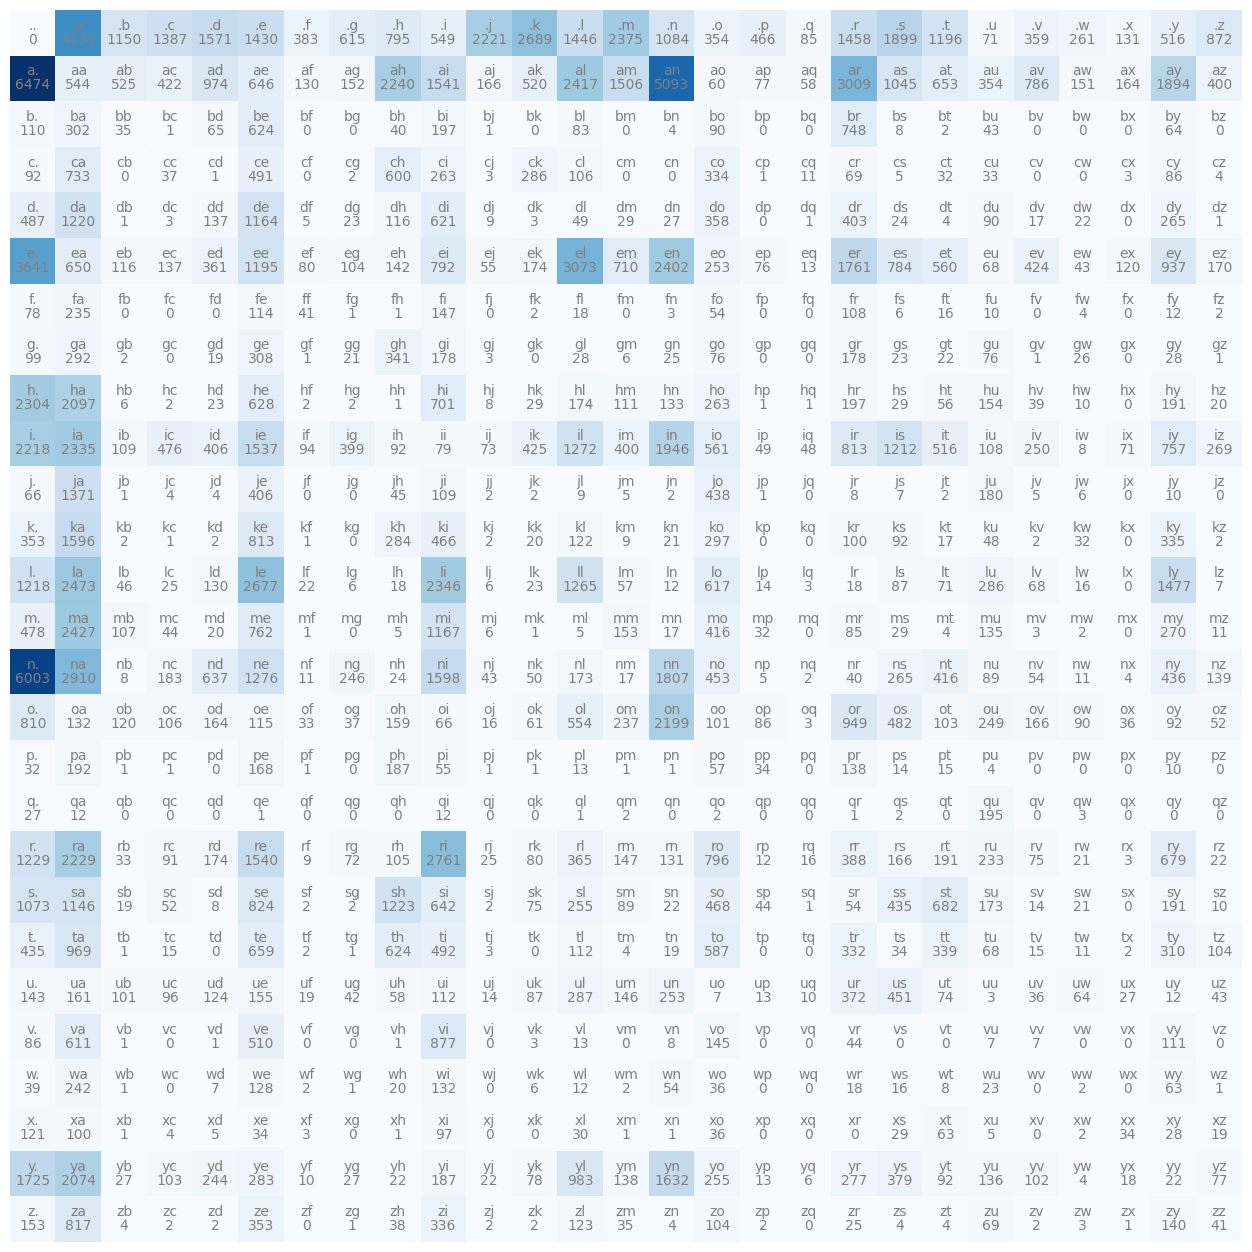

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(bigram_matrix, cmap='Blues')
for i in range(vocab_size):
    for j in range(vocab_size):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, bigram_matrix[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')